In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px




## Data Exploration

    Here, let,s work on get better our variables, which as int, float and object...datetime, etc.

In [3]:
startups = pd.read_csv('../data/startup data.csv')
startups

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [50]:
# Here, we get all ids for original dataset 

x = startups['id'].str.split(':', expand=True)
x.rename(columns={0:'numero',1:'id'}, inplace=True)
ids = x['id'].astype(int)


In [51]:
startups['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [4]:
# Upload the milestones dataset for get all milestone from differents companies with their ids
miles1 = pd.read_csv('../data/milestones.csv')
miles1.drop(columns='id', inplace=True)
miles1.head()

,object_id,milestone_at,milestone_code,description,source_url,source_description,created_at,updated_at
0,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,http://www.techcrunch.com/2008/06/10/twitter-f...,"Twitter Fails To Fail, Community Rejoices",2008-06-18 08:14:06,2008-06-18 08:14:06
1,c:3138,2008-06-17,other,Twhirl announces support for Seesmic video pla...,http://www.inquisitr.com/1103/seesmic-now-avai...,Seesmic Now Available In Twhirl,2008-06-18 08:46:28,2008-06-18 08:46:28
2,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,http://www.comscore.com/press/release.asp?pres...,11 Billion Videos Viewed Online in the U.S. in...,2008-06-18 08:50:24,2008-06-18 08:50:24
3,c:314,2008-06-18,other,Reddit goes Open Source,http://blog.reddit.com/2008/06/reddit-goes-ope...,reddit goes open source,2008-06-19 04:14:00,2008-06-19 04:14:00
4,c:314,2008-01-22,other,Adds the ability to create your own Reddits,http://www.techcrunch.com/2008/01/22/reddit-ad...,Reddit Adds Ability to Create Your Own âRedd...,2008-06-19 04:15:53,2008-06-19 04:15:53


In [53]:
# Separate columns for getting split id
id = miles1['object_id'].str.split(':', expand=True)

miles = pd.concat([id,miles1], axis = 1)


In [54]:
miles.rename(columns= {1:'id'}, inplace=True)
miles['id'] = miles['id'].astype(int)

In [55]:
# Compare same id with original datasets and miles dataset
miles['in'] = np.where((miles['id'].isin(ids)),1,0)

miles = miles[miles['in'] == 1]

#x.reset_index().to_csv('miles_create.csv')

In [56]:
miles

,0,id,object_id,milestone_at,milestone_code,description,source_url,source_description,created_at,updated_at,in
3,c,314,c:314,2008-06-18,other,Reddit goes Open Source,http://blog.reddit.com/2008/06/reddit-goes-ope...,reddit goes open source,2008-06-19 04:14:00,2008-06-19 04:14:00,1
4,c,314,c:314,2008-01-22,other,Adds the ability to create your own Reddits,http://www.techcrunch.com/2008/01/22/reddit-ad...,Reddit Adds Ability to Create Your Own âRedd...,2008-06-19 04:15:53,2008-06-19 04:15:53,1
11,c,1388,c:1388,2011-02-06,other,AOL Acquires Huffington Post,http://online.wsj.com/article/SB10001424052748...,AOL Acquires Huffington PostHuffington Post st...,2008-06-19 22:13:09,2011-02-08 02:19:45,1
23,c,5411,c:5411,2008-06-03,other,Sometrics has introduced an ad-serving platfor...,http://publications.mediapost.com/index.cfm?fu...,Sometrics Launches Social Ad-Serving Platform,2008-06-23 01:49:03,2008-06-23 19:16:11,1
54,c,7163,c:7163,2009-01-01,other,FlyCast covers 1500+ terrestrial stations with...,http://technorati.com/posts/B0HC%2BdlQxbawlolU...,Flytunes goes from 50 to more than 160 channels,2008-06-24 18:10:31,2009-06-18 00:02:33,1
...,...,...,...,...,...,...,...,...,...,...,...
38955,c,437,c:437,2013-06-25,other,TokBox launches OpenTok for Customer Service (...,http://techcrunch.com/2013/06/26/tokbox-launch...,TokBox Launches OpenTok For Customer Service A...,2013-12-02 21:43:20,2013-12-04 01:29:32,1
38956,c,437,c:437,2013-11-19,other,TokBox adds TURN over TCP support,http://techcrunch.com/2013/11/19/tokbox-brings...,TokBox Brings Its WebRTC Platform To Native An...,2013-12-02 21:43:20,2013-12-04 01:29:32,1
38957,c,437,c:437,2013-11-19,other,TokBox extends support for building native And...,http://techcrunch.com/2013/11/19/tokbox-brings...,TokBox Brings Its WebRTC Platform To Native An...,2013-12-02 21:43:20,2013-12-04 01:29:32,1
38958,c,437,c:437,2013-11-19,other,TokBox launches Dynamic Frame Rate Control fea...,http://techcrunch.com/2013/11/19/tokbox-brings...,TokBox Brings Its WebRTC Platform To Native An...,2013-12-02 21:43:21,2013-12-04 01:29:32,1


In [57]:
 #NO nueva = miles.groupby(['id']).apply(lambda x: x['source_description'].str.split(','))


In [58]:
# Groupby ids and descriptions

miles = miles.groupby('id').description.apply('AAAA '.join).reset_index()
miles['id'] = miles['id'].astype(str)
miles

,id,description
0,4,Accel Partners Raises 2 new fundsAAAA Another ...
1,9,Announced hire of new CEO
2,27,Long-Time Plaxo CEO Golub Leaves AAAA Plaxo li...
3,30,"KupiBonus.ru Receives Funding From ABRT, Mangr..."
4,40,Veoh declares bankruptcy
...,...,...
303,86120,Netgamix Inc added Patrick de Zeeuw to the adv...
304,102867,"WeHostels awarded ""Most Innovative Startup of ..."
305,144687,Mobile App for iPhone available on iTunesAAAA ...
306,149809,"Trendslide has joined Incutio, the latest 'Gro..."


In [59]:
# We can see the number of times each word has been repeated

from collections import Counter

world_count = list(miles['description'])
big_text = ''.join(world_count)
big_text
world_list = big_text.split()
world_counts = Counter(world_list)
world_counts
most_common_word = world_counts.most_common()
#most_common_word[30:]
most_common_word[20:]

[('Launches', 30),
 ('at', 28),
 ('new', 27),
 ('that', 25),
 ('Qik', 25),
 ('To', 24),
 ('from', 24),
 ('million', 24),
 ('has', 23),
 ('Mobile', 23),
 ('an', 22),
 ('acquired', 21),
 ('With', 21),
 ('OneRiot', 21),
 ('one', 19),
 ('Miller', 19),
 ('Gold', 19),
 ('VirtuOz', 19),
 ('is', 18),
 ('Technology', 18),
 ('Virtual', 18),
 ('San', 17),
 ('For', 17),
 ('iPhone', 17),
 ('invested', 17),
 ('A', 17),
 ('The', 16),
 ('Inc.', 16),
 ('Named', 16),
 ('Business', 16),
 ('Francisco', 15),
 ('Announces', 15),
 ('Search', 15),
 ('Capital', 15),
 ('In', 14),
 ('Video', 14),
 ('Invested', 14),
 ('-', 14),
 ('announces', 14),
 ('online', 14),
 ('Peer39', 14),
 ('Client', 14),
 ('CEO', 13),
 ('First', 13),
 ('100', 13),
 ('VP', 13),
 ('WebVisible', 13),
 ('&', 12),
 ('listAAAA', 12),
 ('it', 12),
 ('Series', 12),
 ('company', 12),
 ('App', 12),
 ('President', 12),
 ('announced', 12),
 ('launched', 12),
 ('are', 12),
 ('Company', 12),
 ('Online', 12),
 ('1', 11),
 ('Network', 11),
 ('recognize

In [60]:
miles

,id,description
0,4,Accel Partners Raises 2 new fundsAAAA Another ...
1,9,Announced hire of new CEO
2,27,Long-Time Plaxo CEO Golub Leaves AAAA Plaxo li...
3,30,"KupiBonus.ru Receives Funding From ABRT, Mangr..."
4,40,Veoh declares bankruptcy
...,...,...
303,86120,Netgamix Inc added Patrick de Zeeuw to the adv...
304,102867,"WeHostels awarded ""Most Innovative Startup of ..."
305,144687,Mobile App for iPhone available on iTunesAAAA ...
306,149809,"Trendslide has joined Incutio, the latest 'Gro..."


In [61]:
#Here we make some binary columns to see how correlated is with rest of features
import re

miles['million'] = np.where(miles['description'].str.contains(r'[M-m]illion', case=False),1,0)
miles['invested'] = np.where(miles['description'].str.contains('invested'),1,0)
miles['Technology'] = np.where(miles['description'].str.contains('Technology'),1,0)
miles['Mobile'] = np.where(miles['description'].str.contains('Mobile'),1,0)
miles['Gold'] = np.where(miles['description'].str.contains('Gold'),1,0)
miles['Hootest'] = np.where(miles['description'].str.contains('Hootest'),1,0)
miles['Iphone'] = np.where(miles['description'].str.contains('Iphone'),1,0)
miles['object_id'] = 'c:'+ miles['id']

miles['million'].value_counts()

0    248
1     60
Name: million, dtype: int64

In [62]:
# Merge two dataframes with most important words about milestones
startups = startups.merge(miles, on='object_id', how='left')
startups.loc[:, 'million':] = startups.loc[:, 'million':].fillna(0)

In [63]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 0 to 922
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id_x                      923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [64]:
startups

,Unnamed: 0,state_code,latitude,longitude,zip_code,id_x,city,Unnamed: 6,name,labels,...,status,id_y,description,million,invested,Technology,Mobile,Gold,Hootest,Iphone
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,acquired,6669,Bandsintown hits 5 million registered usersAAA...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,acquired,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,acquired,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,acquired,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,closed,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,acquired,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,closed,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,closed,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,acquired,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Change name columns and drop some columns we don,t need
startups.rename(columns={'Unnamed: 0':'iD','is_top500':'Top500'}, inplace=True)
startups.drop(columns=['Unnamed: 6','id_x','id_y','labels','state_code.1'], inplace=True)

In [66]:
# Changing status to binary which are gonna be our variable

startups.loc[startups['status'] == 'closed', 'status'] = 0
startups.loc[startups['status'] == 'acquired', 'status'] = 1
startups['status'] = pd.to_numeric(startups['status'])


We are checking null values, which has milestone's columns and closet at.
Milestone columns means when they had importants milestones, and when the value is Nan means, thet did,t have yet nomilestone, so we decide to fill with '0'.
Closed at , we decide to fill with the last day of 2013, which is the current year there is closed bussines, which is 2013.


In [67]:
# change all NaN values, so we use the las day of 2013 for comparision since is the last day of dataset
startups['closed_at'] = startups['closed_at'].fillna('2013-12-31')

In [68]:
# Change to date time for using them in a futures predicts
startups['founded_at'] = pd.to_datetime(startups['founded_at'])
startups['first_funding_at'] = pd.to_datetime(startups['first_funding_at'])
startups['last_funding_at'] = pd.to_datetime(startups['last_funding_at'])
startups['closed_at'] = pd.to_datetime(startups['closed_at'])

In [69]:
# as we can see all values are current in 2013
x = startups['founded_at'].max()
y = startups['first_funding_at'].max()
z = startups['last_funding_at'].max()
j = startups['closed_at'].max() 

display(x, y, z, j)

Timestamp('2013-04-16 00:00:00')

Timestamp('2013-11-20 00:00:00')

Timestamp('2013-11-20 00:00:00')

Timestamp('2013-12-31 00:00:00')

In [70]:
# We create a new feature which show us how many year, they have been running since they ran the first time
startups['age'] = (startups['closed_at']- startups['founded_at'])
startups['age'] = round(startups.age/np.timedelta64(1,'Y'),2).astype(float)
startups

,iD,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,...,status,description,million,invested,Technology,Mobile,Gold,Hootest,Iphone,age
0,1005,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,2007-01-01,2013-12-31,2009-04-01,...,1,Bandsintown hits 5 million registered usersAAA...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.00
1,204,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,2000-01-01,2013-12-31,2005-02-14,...,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.00
2,1001,CA,32.901049,-117.192656,92121,San Diego,Plixi,2009-03-18,2013-12-31,2010-03-30,...,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.79
3,738,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,2002-01-01,2013-12-31,2005-02-17,...,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.00
4,1002,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,2009-01-01,2013-12-31,2009-07-09,...,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00
919,721,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1998-01-01,2008-06-25,2005-04-01,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.48
920,557,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1999-01-01,2012-06-17,2007-06-29,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.46
921,589,CA,37.556732,-122.288378,94404,San Francisco,Causata,2009-01-01,2013-12-31,2009-10-05,...,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00


In [71]:
# fill nan values and check how many values there are

print('NaN Values of closed at column has:',startups['closed_at'].isnull().sum())

NaN Values of closed at column has: 0


In [72]:
# as we see first milestone means diference of years between they founded and first milestone, last milestone mean diference year founded and last milestone, and milestones succeded.
startups[['age_first_milestone_year','age_last_milestone_year','milestones']].head(20)

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1
5,5.0027,5.0027,1
6,3.0000,6.6082,2
7,5.6055,7.3616,3
8,8.0055,9.9945,4
9,2.9178,6.1151,4


In [73]:
startups['milestones'].isnull().sum()

0

In [74]:
startups[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [75]:
# Fill values Nan with 0, cause the startups which does't have any milestone is cause did,t get any milestone yet.
startups[['age_first_milestone_year','age_last_milestone_year','milestones']]=startups[['age_first_milestone_year','age_last_milestone_year','milestones']].fillna(0)

In [76]:
# check them out
startups[['age_first_milestone_year','age_last_milestone_year','milestones']].isnull().sum()

age_first_milestone_year    0
age_last_milestone_year     0
milestones                  0
dtype: int64

In [77]:
startups[[ 'age', 'age_first_funding_year','age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year']].sort_values('age_first_funding_year').head(20)

,age,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year
558,-3.95,-9.0466,-9.0466,-6.0466,-3.8822
584,3.33,-3.5068,0.3945,-0.9370,0.0849
263,5.55,-1.9863,-1.9863,0.0000,0.0000
431,2.83,-1.4712,-0.1370,0.0000,0.0000
489,5.35,-1.1836,-1.1836,0.8301,0.8301
240,2.50,-1.0521,0.6247,-1.3589,1.6630
127,4.41,-1.0110,1.4877,0.4055,1.3205
23,5.59,-1.0000,3.3151,3.6959,5.6630
847,2.03,-1.0000,2.2493,1.7479,1.7479
432,2.39,-1.0000,0.0000,-1.5863,0.8630


In [78]:
# As we see there are just 3 anomal valus, which the closed y older than opened, which is wierd.
startups['closed_at'][73] = pd.to_datetime('28/1/2012')
startups['founded_at'][558] = pd.to_datetime('4/1/2004')
	

/Users/migueldefrutos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/migueldefrutos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
# we remove rows which has values under 0 because, it might be an error
startups = startups.drop(startups[startups['age']<=0].index)
startups = startups.drop(startups[startups['age_first_funding_year']<0].index)
startups = startups.drop(startups[startups['age_last_funding_year']<0].index)
startups = startups.drop(startups[startups['age_first_milestone_year']<0].index)
startups = startups.drop(startups[startups['age_last_milestone_year']<0].index)

In [80]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 922
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iD                        838 non-null    int64         
 1   state_code                838 non-null    object        
 2   latitude                  838 non-null    float64       
 3   longitude                 838 non-null    float64       
 4   zip_code                  838 non-null    object        
 5   city                      838 non-null    object        
 6   name                      838 non-null    object        
 7   founded_at                838 non-null    datetime64[ns]
 8   closed_at                 838 non-null    datetime64[ns]
 9   first_funding_at          838 non-null    datetime64[ns]
 10  last_funding_at           838 non-null    datetime64[ns]
 11  age_first_funding_year    838 non-null    float64       
 12  age_last_funding_year 

## Data analaysis

In [81]:
# We can see correlation between all numeric values

#plt.figure(figsize=(30,22))
#sns.heatmap(startups[startups.columns].corr(), cmap= 'YlOrBr', annot=True);

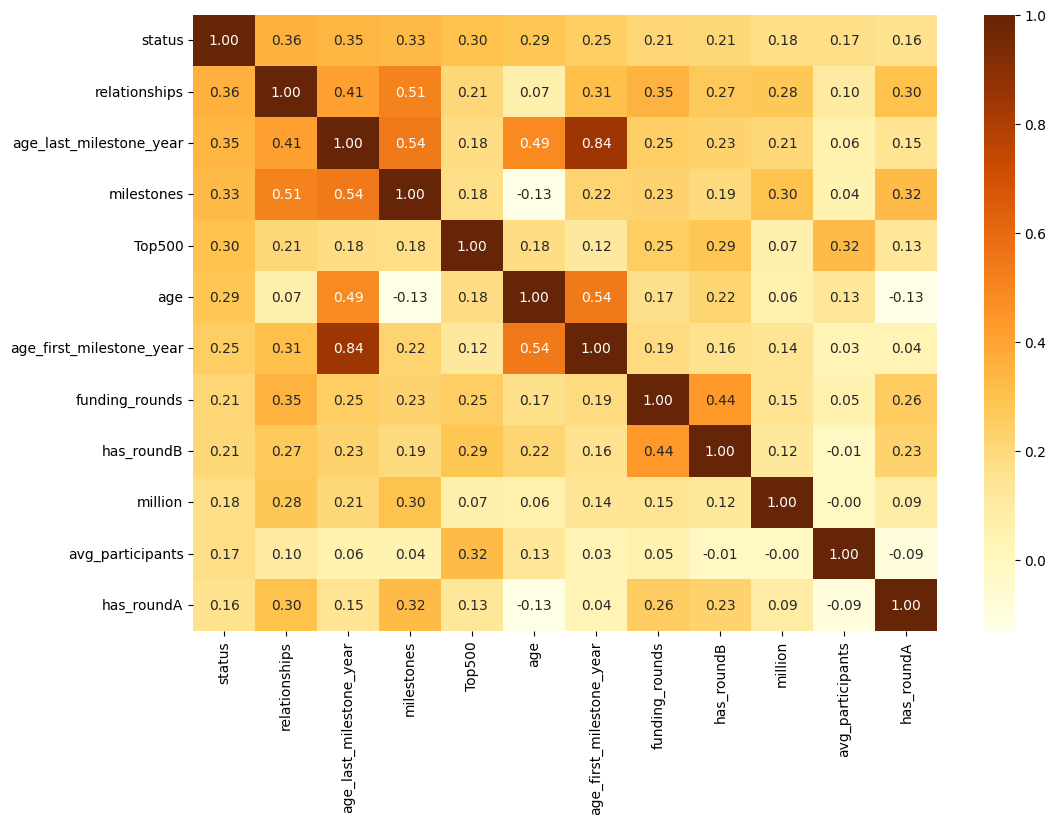

In [82]:
#Here we get the correlation between diferent variables, in this case we get the most 12 correlated
cols = startups[startups.columns].corr().nlargest(12,'status')['status'].index

cm = np.corrcoef(startups[cols].values.T) 

plt.figure(figsize=(12,8))
hm = sns.heatmap(cm, cbar=True, annot=True, cmap='YlOrBr', fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)

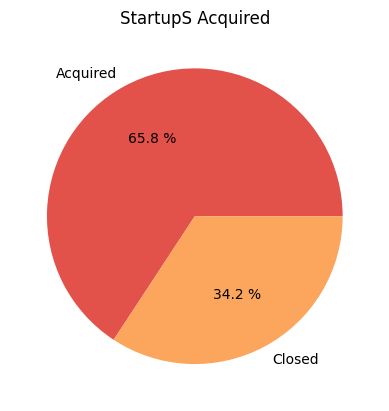

In [83]:
# How is the distribution about acquired and not?

status = startups['status'].value_counts(normalize=True)
fig, ax = plt.subplots()

ax.pie(status, labels = ['Acquired','Closed'], autopct="%0.1f %%")
ax.set_title('StartupS Acquired');

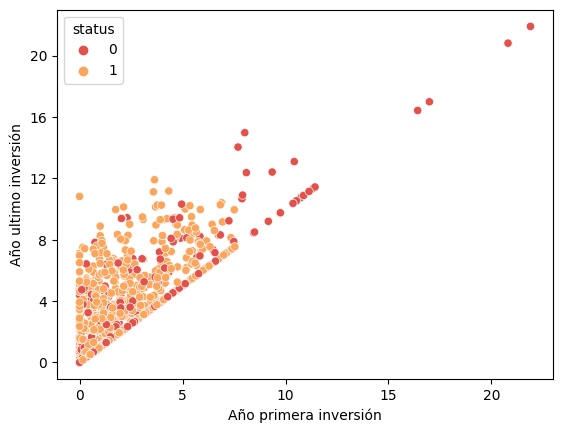

In [84]:
# Here we can check if two features correlated with eachother

sns.color_palette("Spectral", as_cmap=True)

sns.scatterplot(data = startups, x=startups['age_first_funding_year'], y=startups['age_last_funding_year'], hue='status' ,edgecolors='K' ,linewidths=0.5)
plt.yticks((0,4,8,12,16,20))
plt.xlabel('Año primera inversión' )
plt.ylabel('Año ultimo inversión');

<AxesSubplot:xlabel='age_first_milestone_year', ylabel='age_last_milestone_year'>

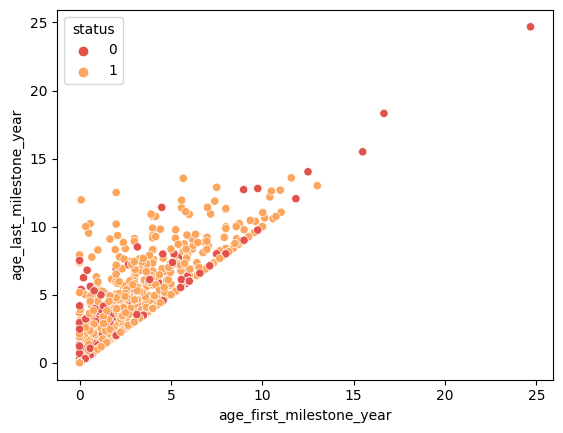

In [85]:
import seaborn as sns

sns.set_palette("Spectral")

sns.scatterplot(data=startups, x='age_first_milestone_year', y='age_last_milestone_year', hue='status', edgecolors='k', linewidths=0.5)


In [86]:
# Here we create a table, where we can see the percentage of success companies
startups['range_relation'] = startups['relationships'].apply(lambda x: 'relationships 0' if x == 0 else 'relationships > 10' if x > 10 else 'relationships 1-10' )


rate_success = startups.groupby(['range_relation','status']).agg({'iD':'count'}).reset_index()
rate_success = pd.pivot_table(rate_success, values = 'iD',columns= ['status'], index= ['range_relation']).reset_index()
rate_success.columns = ['relationships','Closed','Acquired']
rate_success['Total'] = rate_success['Closed'] + rate_success['Acquired'].astype(int)
rate_success['Success Rate'] = round((rate_success['Acquired'] / rate_success['Total'])*100,2).astype(float)
rate_success = rate_success.sort_values(by= 'Success Rate')
rate_success.to_csv('ratesuccess.csv')
rate_success

,relationships,Closed,Acquired,Total,Success Rate
0,relationships 0,33,3,36,8.33
1,relationships 1-10,233,371,604,61.42
2,relationships > 10,21,177,198,89.39


In [87]:
# We can check how the distribution goes along the relationships features

fig = px.bar(rate_success, x='relationships', y=['Closed','Acquired'])
color = sns.set_palette("Spectral")
fig.update_layout(barmode='group',bargroupgap=0.1)
fig.update_layout(title_text='Distribution Success')
fig.update_traces(marker=dict(color='lightsalmon'), selector=dict(name='Acquired'))
fig.update_traces(marker=dict(color='indianred'), selector=dict(name='Closed'))

adquired_trace = fig.data[1]
adquired_trace.update(text=rate_success['Success Rate'], texttemplate='%{text:.0f}%', textposition='outside')
fig.show()


In [88]:
founds = startups.groupby(['state_code','city'])[['funding_total_usd']].sum().sort_values('funding_total_usd',ascending=False).reset_index()
# We can see percentage of found quantity along States and cities
import plotly.graph_objs as go

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])

fig.add_trace(go.Pie(labels = founds.state_code.values, values=founds.funding_total_usd.values, ),1,1)

fig.add_trace(go.Pie(labels = founds.city.values, values=founds.funding_total_usd.values, ),1,2)
fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial')

fig.update_layout(title_text='Total funds ', width=1300,height=500, template = 'plotly_dark')



In [89]:
status = startups.groupby(['funding_rounds','status'])[['status']].count().rename(columns={'status':'count'})
status.reset_index(inplace=True)
status

,funding_rounds,status,count
0,1,0,144
1,1,1,144
2,2,0,85
3,2,1,166
4,3,0,28
5,3,1,127
6,4,0,15
7,4,1,64
8,5,0,7
9,5,1,30


In [90]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=status['funding_rounds'][::2],
    y=status['count'][::2],
    name='closed',
    marker_color='indianred'))
fig.add_trace(go.Bar(
    x=status['funding_rounds'][1::2],
    y=status['count'][1::2].values,
    name='adquired',
    marker_color='lightsalmon'
))
fig.update_layout(title_text='Nº of Relationships')
fig.update_traces(text=status['count'], texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(barmode='group', xaxis_tickangle=-45)




## Feature Engineering

In [91]:
startups['relationships']

0       3
1       9
2       5
3       5
4       2
       ..
918     9
919     1
920     5
921    12
922     4
Name: relationships, Length: 838, dtype: int64

In [92]:
startups['milestones'].value_counts()

1    230
2    218
3    164
0    143
4     54
5     24
6      4
8      1
Name: milestones, dtype: int64

In [93]:
# Min max Scaller cause the values are too big
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

startups['funding_total_usd'] = scaler.fit_transform(startups['funding_total_usd'].values.reshape(-1, 1))

In [94]:
from sklearn.preprocessing import LabelEncoder

# Related with more relationships
startups['relation10'] = np.where(startups['relationships'].isin(range(11,64)),1,0)

# Has round A, B, C and D

startups['Has_roundABCD'] = np.where((startups['has_roundA'] ==1) & (startups['has_roundB'] == 1) & (startups['has_roundA'] == 1) & (startups['has_roundA'] == 1), 1,0)

# Has seed ?

startups['VCAN'] = np.where ((startups['has_VC'] == 1) & (startups['has_angel']),1,0)

# state

le= LabelEncoder()

le.fit(startups['state_code'])
startups['state_code'] = le.transform(startups['state_code'])  # xgboost acepta strings ?

# Nº Milestones per company
startups['milesto-4'] = np.where(startups['milestones'].isin(range(1,4)),1,0)


# How the seasons are correlated 

startups['month'] = startups['last_funding_at'].dt.month

startups['autumn'] = np.where(startups['month'].isin([10,11,12]), 1, 0)
startups['winter'] = np.where(startups['month'].isin([1,2,3]), 1, 0)
startups['spring'] = np.where(startups['month'].isin([4,5,6]), 1, 0)
startups['summer'] = np.where(startups['month'].isin([7,8,9]), 1, 0)

# age of running

startups['age-5'] = np.where(startups['age'].isin(np.arange(0,5,0.06)),1,0)
startups['age+10'] = np.where(startups['age'].isin(np.arange(12,15,0.01)),1,0)

# $ of funds 

startups['-5M'] = np.where(startups['funding_total_usd'].isin(np.arange(0,5*10**6)),1,0)
startups['+5/10M'] = np.where(startups['funding_total_usd'].isin(np.arange(11*10**6)),1,0)
#startups['>10/15M'] = np.where(startups['funding_total_usd'].isin(np.arange(100*10**6,200*10**6)),1,0)




In [95]:
plt.figure(figsize=(12,10))
#sns.heatmap(startups[['status', 'relationships', 'age_last_milestone_year', 'milestones',
       'Top500', 'age', '>10relation', 'age_first_milestone_year',
       'Has_roundABCD', 'funding_rounds', 'has_roundB', 'milesto<4','>5-10M','+5M','funding_total_usd']].corr(), annot = True)

IndentationError: unexpected indent (287094507.py, line 3)

In [ ]:
len(startups['name'].unique())

837

In [ ]:
startups['status'].value_counts(normalize=True)

1    0.657518
0    0.342482
Name: status, dtype: float64

In [ ]:
startups.columns

Index(['iD', 'state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'Top500',
       'status', 'description', 'million', 'invested', 'Technology', 'Mobile',
       'Gold', 'Hootest', 'Iphone', 'age', 'range_relation', '10relation',
       'Has_roundABCD', 'VCAN', 'milesto-4', 'month', 'autumn', 'winter',
       'spring', 'summer', 'age-5', 'a

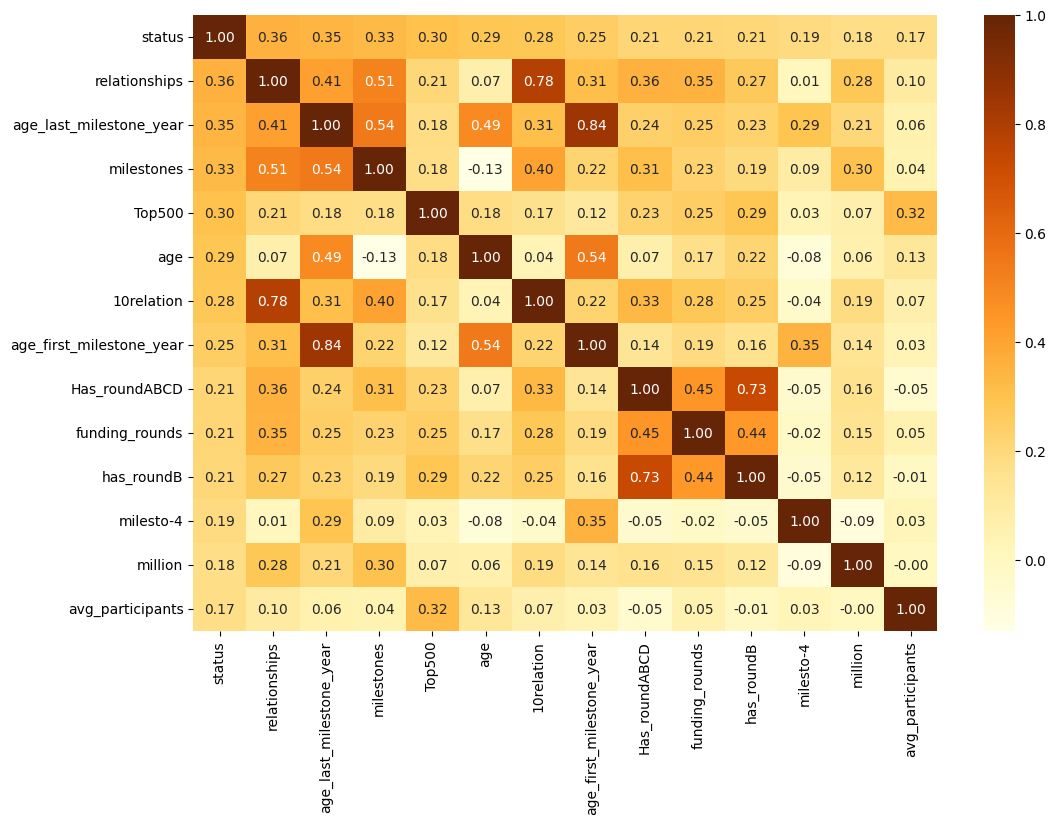

In [ ]:
cols = startups[startups.columns].corr().nlargest(14,'status')['status'].index

cm = np.corrcoef(startups[cols].values.T) 

plt.figure(figsize=(12,8))
hm = sns.heatmap(cm, cbar=True, annot=True, cmap='YlOrBr', fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)

In [ ]:
cols

Index(['status', 'relationships', 'age_last_milestone_year', 'milestones',
       'Top500', 'age', '10relation', 'age_first_milestone_year',
       'Has_roundABCD', 'funding_rounds', 'has_roundB', 'milesto-4', 'million',
       'avg_participants'],
      dtype='object')

In [ ]:
startups['status'].value_counts()

1    551
0    287
Name: status, dtype: int64

In [ ]:
#from sklearn.utils import resample
#def down_sample(df, ratio_classes: float):
#    df_majority = df[df['status'] == 1]
#    df_minority = df[df['status'] == 0]
#    size_minority = int(len(df_minority) * ratio_classes)
#
#    df_majority_downsampled = resample(df_majority,
#                                       replace = False,    # sample without replacement
#                                       n_samples = size_minority,     # to match minority class
#                                       random_state = 123) # reproducible results
#    return pd.concat([df_majority_downsampled, df_minority])

In [124]:
cols

Index(['status', 'relationships', 'age_last_milestone_year', 'milestones',
       'Top500', 'age', 'age_first_milestone_year', 'funding_rounds',
       'has_roundB', 'million', 'avg_participants', 'has_roundA'],
      dtype='object')

In [126]:
closed = startups[startups['status']==0]
acquired = startups[startups['status']==1]

from sklearn.utils import resample

no_credit_under = resample(acquired, replace=False, n_samples=287, random_state=25)
startups = pd.concat([no_credit_under, closed])

In [98]:
no_credit_under['status'].value_counts()

1    287
Name: status, dtype: int64

In [99]:
closed['status'].value_counts()

0    287
Name: status, dtype: int64

In [127]:
X = startups[['relationships', 'age_last_milestone_year', 'milestones',
       'Top500', 'age', 'age_first_milestone_year', 'funding_rounds',
       'has_roundB', 'million', 'avg_participants', 'has_roundA']]

y = startups['status']

In [101]:
y.value_counts()

1    287
0    287
Name: status, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score,roc_auc_score, precision_score,precision_recall_curve, auc
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

seed = 5

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)




print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(459, 11)
(115, 11)
(459,)
(115,)


In [64]:
sm = SMOTE(random_state=2)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
y_train.value_counts()

1    451
0    219
Name: status, dtype: int64

# RANDOM FOREST PRECISION

In [103]:
model = RandomForestClassifier()

parameters = {"n_estimators":[160,170,180,190],
              "max_depth": [5,6,7,8],
              "min_samples_split": [10,11,12,13],
              'max_features' :[3,4]
              }

rf_gs = GridSearchCV(model, parameters, cv=5, scoring="precision")

rf_gs.fit(X_train, y_train)
rf_gs.best_params_

{'max_depth': 7,
 'max_features': 3,
 'min_samples_split': 12,
 'n_estimators': 160}

In [130]:

model_ran = RandomForestClassifier(max_depth=7, min_samples_split=12, n_estimators=160, max_features=3)

model_ran.fit(X_train, y_train)

y_pred_ran = model_ran.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_ran))
print("Recall", recall_score(y_test, y_pred_ran))
print("Precision", precision_score(y_test, y_pred_ran))


accuracy_ran_pre = accuracy_score(y_test, y_pred_ran)

recall_ran_pre = recall_score(y_test, y_pred_ran)

precision_ran_pre = precision_score(y_test, y_pred_ran)

Accuracy 0.8
Recall 0.8214285714285714
Precision 0.7796610169491526


In [105]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_ran)

precision_recall_ran = auc(precision, recall)

print(precision_recall_ran)

0.3035603371783495


In [106]:
y_pred_ran

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1])

Text(0, 0.5, 'True positive rate')

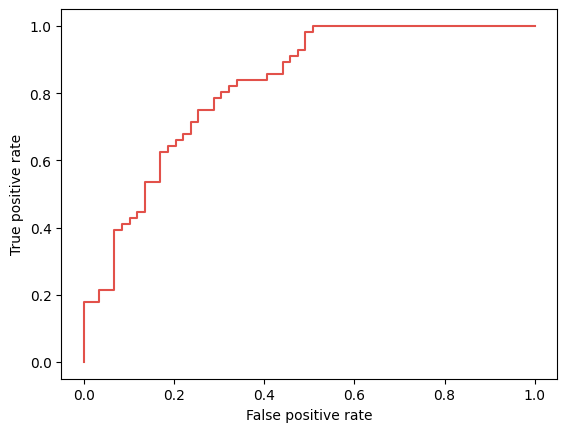

In [107]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_ran)

y_pred_proba = model_ran.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [108]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test, y_pred_ran)

array([[47, 12],
       [19, 37]])

<AxesSubplot:>

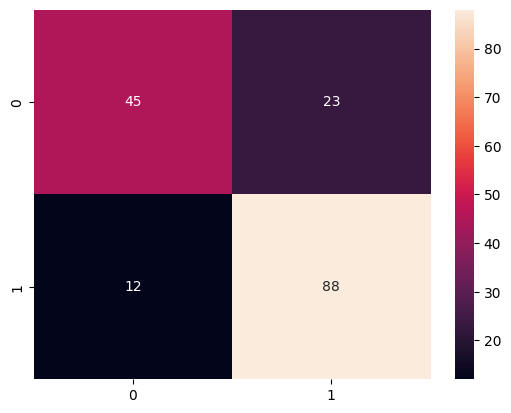

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_ran), annot=True)

In [ ]:
X.columns.values

array(['relationships', 'milestones', 'Top500', 'age', '>10relation',
       'age_first_milestone_year', 'Has_roundABCD', 'funding_rounds',
       'has_roundB', 'milesto<4', 'million'], dtype=object)

In [ ]:
model_ran.feature_importances_

array([0.26923077, 0.07692308, 0.04615385, 0.18461538, 0.10769231,
       0.20769231, 0.02307692, 0.06923077, 0.        , 0.01538462,
       0.        ])

In [ ]:
model_ran.predict_proba(X_test)

array([[3.03494998e-01, 6.96505002e-01],
       [5.20789234e-01, 4.79210766e-01],
       [3.81313329e-01, 6.18686671e-01],
       [7.95282789e-01, 2.04717211e-01],
       [9.83958485e-01, 1.60415153e-02],
       [4.80278041e-01, 5.19721959e-01],
       [7.36639506e-01, 2.63360494e-01],
       [7.58513210e-01, 2.41486790e-01],
       [4.56254847e-01, 5.43745153e-01],
       [5.42554912e-01, 4.57445088e-01],
       [9.18916634e-01, 8.10833658e-02],
       [9.65020099e-01, 3.49799008e-02],
       [6.48818411e-01, 3.51181589e-01],
       [3.48645695e-01, 6.51354305e-01],
       [3.84395479e-01, 6.15604521e-01],
       [9.45124960e-01, 5.48750402e-02],
       [5.71879013e-02, 9.42812099e-01],
       [9.41731371e-01, 5.82686288e-02],
       [9.76478317e-01, 2.35216834e-02],
       [7.91340187e-01, 2.08659813e-01],
       [1.00431659e-01, 8.99568341e-01],
       [2.37017014e-01, 7.62982986e-01],
       [5.17966795e-01, 4.82033205e-01],
       [9.76478317e-01, 2.35216834e-02],
       [5.352826

# GRADIENT BOOSTING PRECISION

In [109]:
model = GradientBoostingClassifier()

parameters = {"n_estimators":[30,20,50,10],
              "max_depth": [1,2,3],
              "learning_rate": [0.1,0.2],
              "min_samples_split": [2,3,4]
              }

gb_gs = GridSearchCV(model, parameters, cv=5, scoring="precision")

gb_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [30, 20, 50, 10]},
             scoring='precision')

In [110]:
gb_gs.best_params_

{'learning_rate': 0.2,
 'max_depth': 2,
 'min_samples_split': 3,
 'n_estimators': 50}

In [134]:
model_gra = GradientBoostingClassifier(learning_rate=0.2, max_depth=2, min_samples_split= 3, n_estimators= 50)

model_gra.fit(X_train, y_train)

y_pred_gra = model_gra.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_gra))
print("Recall", recall_score(y_test, y_pred_gra))
print("Precision", precision_score(y_test, y_pred_gra))

accuracy_gra_pre = accuracy_score(y_test, y_pred_gra)

recall_gra_pre = recall_score(y_test, y_pred_gra)

precision_gra_pre = precision_score(y_test, y_pred_gra)

Accuracy 0.7913043478260869
Recall 0.8214285714285714
Precision 0.7666666666666667


Text(0, 0.5, 'True positive rate')

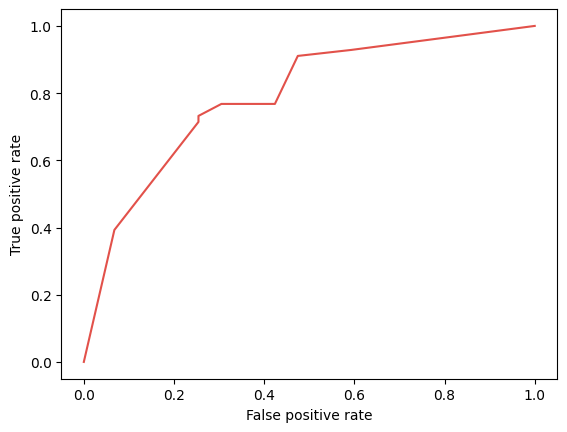

In [69]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_gra)

y_pred_proba = model_gra.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [70]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_gra)

precision_recall_ran = auc(precision, recall)

print(precision_recall_ran)

0.3033879164313947


In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_gra)

array([[44, 15],
       [16, 40]])

<AxesSubplot:>

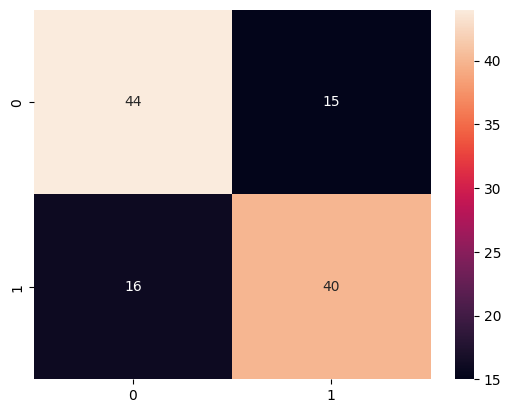

In [72]:
sns.heatmap(confusion_matrix(y_test, y_pred_gra), annot=True)

In [73]:
model_gra.predict_proba(X_test)

array([[0.42001801, 0.57998199],
       [0.54295608, 0.45704392],
       [0.42001801, 0.57998199],
       [0.57943451, 0.42056549],
       [0.7316003 , 0.2683997 ],
       [0.42001801, 0.57998199],
       [0.58894484, 0.41105516],
       [0.70152148, 0.29847852],
       [0.42001801, 0.57998199],
       [0.42001801, 0.57998199],
       [0.7316003 , 0.2683997 ],
       [0.7316003 , 0.2683997 ],
       [0.57943451, 0.42056549],
       [0.42001801, 0.57998199],
       [0.42001801, 0.57998199],
       [0.58894484, 0.41105516],
       [0.36005183, 0.63994817],
       [0.70152148, 0.29847852],
       [0.7316003 , 0.2683997 ],
       [0.57943451, 0.42056549],
       [0.36005183, 0.63994817],
       [0.42001801, 0.57998199],
       [0.54295608, 0.45704392],
       [0.7316003 , 0.2683997 ],
       [0.42001801, 0.57998199],
       [0.7316003 , 0.2683997 ],
       [0.42001801, 0.57998199],
       [0.42001801, 0.57998199],
       [0.7316003 , 0.2683997 ],
       [0.42001801, 0.57998199],
       [0.

# ADA BOOST

In [112]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

parameters = {"n_estimators":[23,30,40,50,60,70,80,90],
              "learning_rate": [0.1,0.2],
              "random_state": [10,20,23]
              }

ada_cl = GridSearchCV(model, parameters, cv=5, scoring="precision")

ada_cl.fit(X_train, y_train)
ada_cl.best_params_

{'learning_rate': 0.2, 'n_estimators': 50, 'random_state': 10}

In [136]:
model = AdaBoostClassifier(learning_rate=0.2, n_estimators=50)

model.fit(X_train, y_train)

y_pred_ada = model.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_ada))
print("Recall", recall_score(y_test, y_pred_ada))
print("Precision", precision_score(y_test, y_pred_ada))


accuracy_ada_pre = accuracy_score(y_test, y_pred_ada)

recall_ada_pre = recall_score(y_test, y_pred_ada)

precision_ada_pre = precision_score(y_test, y_pred_ada)


Accuracy 0.8
Recall 0.8035714285714286
Precision 0.7894736842105263


In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_ada)

array([[47, 12],
       [16, 40]])

# XGB CLASS

In [116]:
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier

model = XGBClassifier()

parameters = {"n_estimators":[23,30,40,50],
              "max_depth": [1,2,3]
              }

xgb_cl = GridSearchCV(model, parameters, cv=5, scoring="precision",error_score='raise')

xgb_cl.fit(X_train, y_train)
xgb_cl.best_params_

{'max_depth': 3, 'n_estimators': 30}

In [137]:

from xgboost import XGBRFClassifier

xgb_cl = XGBRFClassifier(n_estimators=30,max_depth=3, random_state=seed, booster='gbtree', class_weight = 'balanced')
xgb_cl.fit(X_train, y_train)

y_pred_xgb = xgb_cl.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_xgb))
print("Recall", recall_score(y_test, y_pred_xgb))
print("Precision", precision_score(y_test, y_pred_xgb))


accuracy_xgb_re = accuracy_score(y_test, y_pred_xgb)

recall_xgb_re = recall_score(y_test, y_pred_xgb)

precision_xgb_re = precision_score(y_test, y_pred_xgb)


[12:00:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Accuracy 0.808695652173913
Recall 0.8392857142857143
Precision 0.7833333333333333


Text(0, 0.5, 'True positive rate')

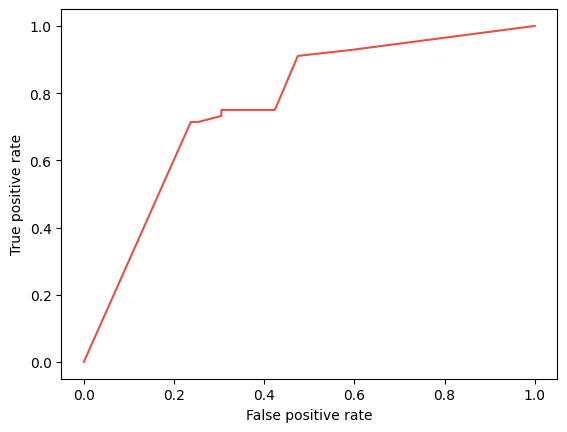

In [79]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_xgb)

y_pred_proba = xgb_cl.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_xgb)

array([[44, 15],
       [16, 40]])

# KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

parameters = {"n_neighbors":range(1,10),
              "weights": ["uniform", "distance"],
              "p": [1, 2],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
              "leaf_size": [10, 20, 30],
              "metric": ["euclidean", "manhattan", "chebyshev"]
              }

xgb_cl = GridSearchCV(model, parameters, cv=5, scoring="precision",error_score='raise')

xgb_cl.fit(X_train, y_train)
xgb_cl.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'metric': 'chebyshev',
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

In [138]:

knn = KNeighborsClassifier(
 leaf_size= 30,
 metric= 'chebyshev',
 n_neighbors=2,
 p= 1)

knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.71


In [140]:
from sklearn.metrics import confusion_matrix, classification_report

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

print(precision_score(y_test, pred))

print(recall_score(y_test, pred))

recall_knn_re = recall_score(y_test, pred)

precision_knn_re = precision_score(y_test, pred)


[[49 10]
 [23 33]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        59
           1       0.77      0.59      0.67        56

    accuracy                           0.71       115
   macro avg       0.72      0.71      0.71       115
weighted avg       0.72      0.71      0.71       115

0.7674418604651163
0.5892857142857143


In [123]:
Results = pd.DataFrame({'Recall': [recall_ran_pre, recall_gra_pre, recall_ada_pre,recall_xgb_re,recall_knn_re],
                            'Accuracy': [accuracy_ran_pre,accuracy_gra_pre, accuracy_ada_pre,accuracy_xgb_re,'HOLA'],
                            'Precision':[ precision_ran_pre,precision_gra_pre,precision_ada_pre,precision_xgb_re,precision_knn_re]}, 
                            index = ['RANDOMUNDER','GRADIENTUNDER','ADABOOSTUNDER','XGBRFBOOSTUNDER','KNNUNDER'])

Results



,Recall,Accuracy,Precision
RANDOMUNDER,0.660714,0.730435,0.755102
GRADIENTUNDER,0.732143,0.782609,0.803922
ADABOOSTUNDER,0.696429,0.730435,0.735849
XGBRFBOOSTUNDER,0.642857,0.721739,0.750000
KNNUNDER,0.446429,HOLA,0.735294


# Features importances

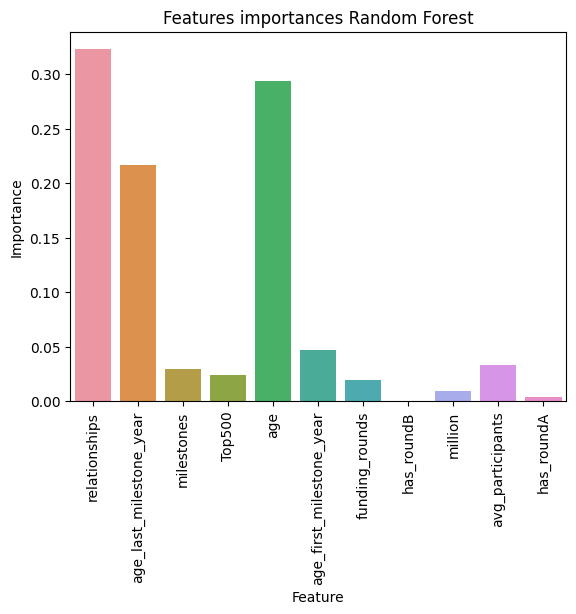

In [141]:
importances = pd.DataFrame({'Importance':model_gra.feature_importances_,'Feature':X.columns })
sns.barplot(x = 'Feature', y = 'Importance', data= importances)
sns.color_palette("Spectral",as_cmap=True)
plt.xticks(rotation=90)
plt.title('Features importances Random Forest');

# PICKLE

In [ ]:
from sklearn.pipeline import Pipeline

pipe_final = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('classifier', RandomForestClassifier(max_depth=1, min_samples_split=3, n_estimators=130,random_state=2))
])
print("Accuracy", accuracy_score(y_test, y_pred_ran))
print("Recall", recall_score(y_test, y_pred_ran))
pipe_final.fit(X_train,y_train)
pipe_final

Accuracy 0.7440476190476191
Recall 0.99


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=1, min_samples_split=3,
                                        n_estimators=130, random_state=2))])

In [ ]:
#X_test = pd.DataFrame({})

In [ ]:
import pickle

with open('model_miguel.sav', 'wb') as archivo_salida:
    pickle.dump(pipe_final, archivo_salida)

In [ ]:
with open('model_miguel.sav', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
#X_test.to_csv('X_test_prueba.csv')

In [ ]:
loaded_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
loaded_model.predict_proba(X_test) 

# > 0,6 
# threshold

NameError: name 'loaded_model' is not defined

In [ ]:
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        47
           1       0.93      0.84      0.88       121

    accuracy                           0.84       168
   macro avg       0.80      0.84      0.81       168
weighted avg       0.86      0.84      0.84       168

